In [89]:
import pickle
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm

from PIL import Image
import numpy as np

In [2]:
A = pickle.load(open('tmp/mil/infos.pkl', 'rb'), encoding='iso-8859-1')

In [3]:
A.keys()

dict_keys(['iter', 'epoch', 'iterators', 'best_val_score', 'opt', 'val_result_history', 'loss_history', 'lr_history', 'vocab'])

In [4]:
R = A['val_result_history']

In [5]:
R.keys()

dict_keys([4000, 8000, 12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 44000, 48000, 52000, 56000, 60000, 64000, 68000, 72000, 76000, 80000, 84000, 88000, 92000, 96000, 100000, 104000, 108000, 112000, 116000, 120000, 124000, 128000, 132000, 136000, 140000, 144000, 148000, 152000, 156000, 160000, 164000, 168000, 172000, 176000, 180000, 184000, 188000, 192000, 196000, 200000, 204000, 208000, 212000, 216000, 220000, 224000, 228000, 232000, 236000, 240000, 244000, 248000, 252000, 256000, 260000, 264000, 268000, 272000, 276000, 280000, 284000, 288000, 292000, 296000, 300000, 304000, 308000, 312000, 316000, 320000, 324000, 328000, 332000, 336000, 340000, 344000, 348000, 352000, 356000, 360000, 364000, 368000, 372000, 376000, 380000, 384000, 388000, 392000, 396000, 400000, 404000, 408000, 412000, 416000, 420000, 424000, 428000, 432000, 436000, 440000, 444000, 448000, 452000, 456000, 460000, 464000, 468000])

In [6]:
P = R[468000]

In [7]:
len(P)

2

In [8]:
P.keys()

dict_keys(['loss', 'predictions'])

In [9]:
P = P['predictions']

In [10]:
len(P)

5000

In [11]:
P

[{'image_id': 184613,
  'words': 'man next young grass standing boy group people several two kids black field walking around little'},
 {'image_id': 403013,
  'words': 'room next counter inside area kitchen stove floor white large door modern small open well bathroom'},
 {'image_id': 562150,
  'words': 'girl young woman boy smiling cat red lady sitting eating holding beautiful orange next plate food'},
 {'image_id': 360772,
  'words': 'green wall next toilet bathroom sitting sink white small paper top seat floor door picture sits'},
 {'image_id': 340559,
  'words': 'pan ceiling kitchen cooking machine filled steel two inside stove sitting black oven pans white sink'},
 {'image_id': 321107,
  'words': 'next man bicycle bike people bikes street riding two motor sitting woman top city around near'},
 {'image_id': 129001,
  'words': 'toilet next white bathroom children tiled shower sitting room walls small bath sink stand front glass'},
 {'image_id': 556616,
  'words': 'people cell street 

In [19]:
coco = json.load(open('data/coco/dataset_coco.json'))
coco = coco['images']

In [35]:
Caps = {}
for item in coco:
    Caps[item['cocoid']] = ' '.join(["<li>"+sent['raw']+"</li>" for sent in item['sentences']])

In [36]:
Caps[391895]

'<li>A man with a red helmet on a small moped on a dirt road. </li> <li>Man riding a motor bike on a dirt road on the countryside.</li> <li>A man riding on the back of a motorcycle.</li> <li>A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. </li> <li>A man in a red shirt and a red hat is on a motorcycle on a hill side.</li>'

In [43]:
extra = pickle.load(open('tmp/mil/mil_results.json', 'rb'))

In [81]:
Res = {}
for item in extra:
    Res[item['image_id']] = {
        'words': item['words'].split(),
        'probs': item['probs'],
        'regions': item['regions'],
        'region scores': item['region probs']
    }
    output = ''
    for w, p, r, pr in zip(item['words'].split(), item['probs'], item['regions'], item['region probs']):
        output += "<li>" + w + " - score: %.3f" % p + " - Region %d (%.3f)</li>" % (r , pr)
    Res[item['image_id']]['output'] = output

In [117]:
list(Res)[:10]

[391895, 60623, 483108, 384213, 386164, 223648, 403385, 294832, 462565, 436141]

In [73]:
with open('mil.html', 'w') as f:
    f.write('<body topmargin="50" leftmargin="100" rightmargin="0">')
    for id in Res:
        f.write('<img style="width: 300px; height: 300px;" src="file:///home/maha/work/torchcap/data/coco/images/val2014/COCO_val2014_%012d.jpg"> <br> \
                 <p> <b>Captions: </b> </p>\
                 <ul> %s </ul>\
                 <p> <b> MIL: </b> </p>\
                 <ul> %s </ul>\
                 <br>' % (id, Caps[id], Res[id]['output']))
    f.write('</body>')

r: 63 word: bathroom x:  146 y: 0
Visited: visited
r: 0 word: next x:  0 y: 0
Visited: visited
r: 72 word: toilet x:  178 y: 0
Visited: visited
r: 49 word: tiled x:  82 y: 50
Visited: visited
r: 37 word: sink x:  50 y: 0
Visited: visited
r: 6 word: room x:  0 y: 114
Visited: visited
r: 58 word: shower x:  114 y: 50
Visited: visited
r: 48 word: bath x:  82 y: 18
Visited: visited
r: 12 word: window x:  0 y: 18
Visited: visited
r: 73 word: white x:  178 y: 0
Visited: visited
r: 50 word: walls x:  82 y: 82
Visited: visited
r: 17 word: floor x:  0 y: 178
Visited: visited
r: 17 word: wooden x:  0 y: 178
Visited: visited
r: 17 word: wood x:  0 y: 178
Visited: visited
r: 19 word: mirror x:  0 y: 0
Visited: visited
r: 8 word: small x:  0 y: 178
Visited: visited


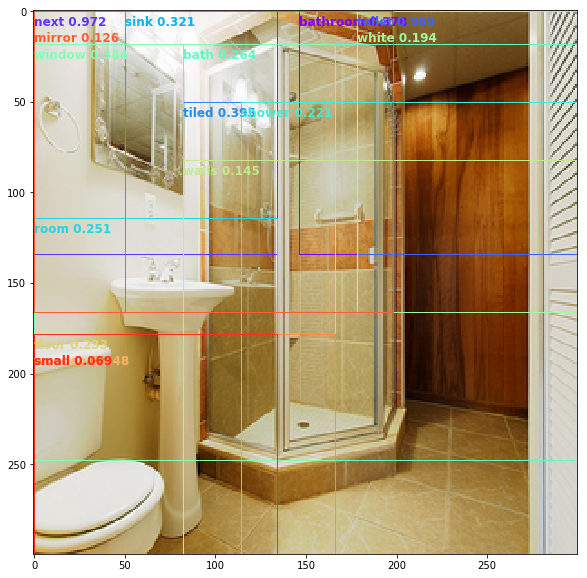

In [120]:
id = 294832
img = Image.open('data/coco/images/val2014/COCO_val2014_%012d.jpg' % id)
img = img.resize((300, 300), Image.ANTIALIAS)
fig, ax = plt.subplots(1, figsize=(10, 10))
# Display the image
ax.imshow(img)
# Create a Rectangle patch
colors = cm.rainbow(np.linspace(0, 1, 17))
visited = []
for e, r in enumerate(Res[id]['regions']):
    # from index find the corresponding receptive field
    x = 28 + (r // 9) * 32 - 106
    y = 28 + (r % 9) * 32 - 106
    w = x + 212
    h = y + 212
    x = max(x, 0)
    y = max(y, 0)
    print('r:', r, 'word:', Res[id]['words'][e], 'x: ', x, 'y:', y)
    rect = patches.Rectangle((x, y), w, h,
                             linewidth=1,
                             edgecolor=colors[e],
                             facecolor='none')
    if (x,y) not in visited:
        shift = 8
    else:
        shift = 17
    ax.text(x,y + shift,
        Res[id]['words'][e]+' ' +
        str(round(Res[id]['region scores'][e], 3)),
        fontsize=12, weight = 'bold', color = colors[e])
            
    # Add the patch to the Axes
    ax.add_patch(rect)
    visited.append((x,y))
    print('Visited: visited')
plt.show()